In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("cleaned_data.csv")

In [3]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,1587,45,13,0,0,0,0,0,0,0
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,1587,27,19,0,0,0,0,0,0,0
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,1587,4,11,0,0,0,0,0,0,0
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,872,16,10,0,0,0,0,0,0,0
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,872,27,12,0,0,0,0,0,0,0


In [4]:
data["date_format"]=data["Year"].astype(str)+data["Month"].astype(str).str.zfill(2) + data["DayofMonth"].astype(str).str.zfill(2)
data["Date"]=pd.to_datetime(data["date_format"] , format="%Y%m%d")

In [5]:
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date_format,Date
0,0,2006,1,11,3,743.0,745,1024.0,1018,US,...,13,0,0,0,0,0,0,0,20060111,2006-01-11
1,1,2006,1,11,3,1053.0,1053,1313.0,1318,US,...,19,0,0,0,0,0,0,0,20060111,2006-01-11
2,2,2006,1,11,3,1915.0,1915,2110.0,2133,US,...,11,0,0,0,0,0,0,0,20060111,2006-01-11
3,3,2006,1,11,3,1753.0,1755,1925.0,1933,US,...,10,0,0,0,0,0,0,0,20060111,2006-01-11
4,4,2006,1,11,3,824.0,832,1015.0,1015,US,...,12,0,0,0,0,0,0,0,20060111,2006-01-11


In [6]:
data=data[["Date" , "TailNum" , "DepTime" ,"ArrTime" , "ArrDelay" , "DepDelay" , "Origin" , "Dest" , "Year" , "Month" , "DayofMonth"]]

In [7]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth
0,2006-01-11,N657AW,743.0,1024.0,6.0,-2.0,ATL,PHX,2006,1,11
1,2006-01-11,N834AW,1053.0,1313.0,-5.0,0.0,ATL,PHX,2006,1,11
2,2006-01-11,N605AW,1915.0,2110.0,-23.0,0.0,ATL,PHX,2006,1,11
3,2006-01-11,N312AW,1753.0,1925.0,-8.0,-2.0,AUS,PHX,2006,1,11
4,2006-01-11,N309AW,824.0,1015.0,0.0,-8.0,AUS,PHX,2006,1,11
...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007-12-15,N670DN,1558.0,1749.0,13.0,-7.0,MCO,ATL,2007,12,15
14268924,2007-12-15,N829MH,1902.0,2110.0,5.0,11.0,ATL,SLC,2007,12,15
14268925,2007-12-15,N623DL,1024.0,1750.0,15.0,-1.0,LAX,ATL,2007,12,15
14268926,2007-12-15,N970DL,1353.0,1658.0,36.0,38.0,DFW,ATL,2007,12,15


In [8]:
data["DepTime"]=data["DepTime"].astype(str)

In [9]:
def cleaner(value):
    list=value.split(".")
    value1=list[0]
    return value1

In [10]:
data["DepTime"]=data["DepTime"].apply(cleaner)

In [11]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth
0,2006-01-11,N657AW,743,1024.0,6.0,-2.0,ATL,PHX,2006,1,11
1,2006-01-11,N834AW,1053,1313.0,-5.0,0.0,ATL,PHX,2006,1,11
2,2006-01-11,N605AW,1915,2110.0,-23.0,0.0,ATL,PHX,2006,1,11
3,2006-01-11,N312AW,1753,1925.0,-8.0,-2.0,AUS,PHX,2006,1,11
4,2006-01-11,N309AW,824,1015.0,0.0,-8.0,AUS,PHX,2006,1,11
...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007-12-15,N670DN,1558,1749.0,13.0,-7.0,MCO,ATL,2007,12,15
14268924,2007-12-15,N829MH,1902,2110.0,5.0,11.0,ATL,SLC,2007,12,15
14268925,2007-12-15,N623DL,1024,1750.0,15.0,-1.0,LAX,ATL,2007,12,15
14268926,2007-12-15,N970DL,1353,1658.0,36.0,38.0,DFW,ATL,2007,12,15


In [12]:
#Take the number of minutes of the DepTime and arrange the data according to the deptime in the ascending order
no_of_minutes=data.DepTime.astype(str).str[-2:]

In [13]:
no_of_minutes

0           43
1           53
2           15
3           53
4           24
            ..
14268923    58
14268924    02
14268925    24
14268926    53
14268927    24
Name: DepTime, Length: 14268928, dtype: object

In [14]:
#Take the number of hours of the time
no_of_hours=data.DepTime.astype(str).str[:-2]
no_of_hours[no_of_hours== ""]= "0"

In [15]:
no_of_hours

0            7
1           10
2           19
3           17
4            8
            ..
14268923    15
14268924    19
14268925    10
14268926    13
14268927    18
Name: DepTime, Length: 14268928, dtype: object

In [16]:
#change days to the datetime format
day_new=data.DayofMonth.astype(str)
day_new=day_new.apply(lambda x :"{0:0>2}" . format(x) )

In [17]:
data["DateTime"]=pd.to_datetime(data.Year.astype(str) + "/" + data.Month.astype(str)+ "/" + day_new.astype(str)
                                + "," + no_of_hours + ":" + no_of_minutes , format="%Y/%m/%d,%H:%M")

In [18]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime
0,2006-01-11,N657AW,743,1024.0,6.0,-2.0,ATL,PHX,2006,1,11,2006-01-11 07:43:00
1,2006-01-11,N834AW,1053,1313.0,-5.0,0.0,ATL,PHX,2006,1,11,2006-01-11 10:53:00
2,2006-01-11,N605AW,1915,2110.0,-23.0,0.0,ATL,PHX,2006,1,11,2006-01-11 19:15:00
3,2006-01-11,N312AW,1753,1925.0,-8.0,-2.0,AUS,PHX,2006,1,11,2006-01-11 17:53:00
4,2006-01-11,N309AW,824,1015.0,0.0,-8.0,AUS,PHX,2006,1,11,2006-01-11 08:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14268923,2007-12-15,N670DN,1558,1749.0,13.0,-7.0,MCO,ATL,2007,12,15,2007-12-15 15:58:00
14268924,2007-12-15,N829MH,1902,2110.0,5.0,11.0,ATL,SLC,2007,12,15,2007-12-15 19:02:00
14268925,2007-12-15,N623DL,1024,1750.0,15.0,-1.0,LAX,ATL,2007,12,15,2007-12-15 10:24:00
14268926,2007-12-15,N970DL,1353,1658.0,36.0,38.0,DFW,ATL,2007,12,15,2007-12-15 13:53:00


In [19]:
data=data.sort_values(["TailNum" , "DateTime"])

In [20]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime
492951,2006-01-01,0,2036,2341.0,26.0,51.0,JFK,FLL,2006,1,1,2006-01-01 20:36:00
414984,2006-01-01,0,2055,2154.0,-1.0,0.0,CVG,CAK,2006,1,1,2006-01-01 20:55:00
493338,2006-01-02,0,2036,1205.0,770.0,51.0,JFK,FLL,2006,1,2,2006-01-02 20:36:00
415810,2006-01-02,0,2145,2300.0,95.0,100.0,CVG,RDU,2006,1,2,2006-01-02 21:45:00
417031,2006-01-04,0,1505,1734.0,-18.0,-10.0,MEM,CVG,2006,1,4,2006-01-04 15:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00


In [21]:
#remove column with TailNum = 0
data=data[~(data["TailNum"]=="0")]

In [22]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00


In [23]:
#shift the destination coloumn one row down and check if the dest is same as the origin of the next flight 
data["set_origin"]=data["Dest"].shift(1)

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\384056481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["set_origin"]=data["Dest"].shift(1)


In [24]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00,NaN
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00,HNL
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK


In [25]:
def cleaner(df):
    if df["Origin"] == df["set_origin"]:
        return 1
    else:
        return 0

In [26]:
data["origin_matched"]=data.apply(cleaner , axis=1)

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\231708418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["origin_matched"]=data.apply(cleaner , axis=1)


In [27]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00,NaN,0
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00,HNL,0
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1


In [29]:
#shift the tailnum coloumn one row down and check if the current tail num is same as the tail num of the next flight

In [30]:

data["set_tailnumber"]=data["TailNum"].shift(1).copy()

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\1740464858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["set_tailnumber"]=data["TailNum"].shift(1).copy()


In [31]:
data 

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00,NaN,0,NaN
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00,HNL,0,NHZOAL
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL


In [32]:
def cleaner(df):
    if df["TailNum"] == df["set_tailnumber"]:
        return 1
    else:
        return 0

In [33]:
data["tailnumber_matched"]=data.apply(cleaner , axis=1)

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\3972220103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tailnumber_matched"]=data.apply(cleaner , axis=1)


In [34]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00,NaN,0,NaN,0
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E,1
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00,HNL,0,NHZOAL,1
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL,1


In [36]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched
7450605,2007-01-01,80009E,555,807.0,-8.0,-5.0,PHL,IND,2007,1,1,2007-01-01 05:55:00,NaN,0,NaN,0
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E,1
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1
14191916,2007-12-30,NHZOAL,1509,1827.0,22.0,39.0,OAK,KOA,2007,12,30,2007-12-30 15:09:00,HNL,0,NHZOAL,1
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL,1


In [37]:
data=data[(data["tailnumber_matched"] ==1) & (data["origin_matched"]==1)]

In [38]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E,1
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E,1
7450798,2007-01-01,80009E,1926,2155.0,-2.0,-4.0,MEM,GSP,2007,1,1,2007-01-01 19:26:00,MEM,1,80009E,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191896,2007-12-28,NHZOAL,1527,1608.0,-24.0,-23.0,KOA,HNL,2007,12,28,2007-12-28 15:27:00,KOA,1,NHZOAL,1
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL,1


In [39]:
#add a column containing the following arrival delay
data["following_Arr_delay"]=data["ArrDelay"].shift(-1).copy()

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\2030572254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["following_Arr_delay"]=data["ArrDelay"].shift(-1).copy()


In [40]:
data["Current_Arr_delay"]=data["ArrDelay"]

C:\Users\fnafh\AppData\Local\Temp\ipykernel_51764\3016266760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Current_Arr_delay"]=data["ArrDelay"]


In [41]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched,following_Arr_delay,Current_Arr_delay
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E,1,26.0,-22.0
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1,1.0,26.0
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1,-4.0,1.0
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E,1,-2.0,-4.0
7450798,2007-01-01,80009E,1926,2155.0,-2.0,-4.0,MEM,GSP,2007,1,1,2007-01-01 19:26:00,MEM,1,80009E,1,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191896,2007-12-28,NHZOAL,1527,1608.0,-24.0,-23.0,KOA,HNL,2007,12,28,2007-12-28 15:27:00,KOA,1,NHZOAL,1,1.0,-24.0
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1,39.0,1.0
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1,45.0,39.0
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL,1,8.0,45.0


In [42]:
data=data[(data["following_Arr_delay"] != "NaN") | (data["Current_Arr_delay"] != "NaN") ]

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13991169 entries, 7450601 to 14191898
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Date                 datetime64[ns]
 1   TailNum              object        
 2   DepTime              object        
 3   ArrTime              float64       
 4   ArrDelay             float64       
 5   DepDelay             float64       
 6   Origin               object        
 7   Dest                 object        
 8   Year                 int64         
 9   Month                int64         
 10  DayofMonth           int64         
 11  DateTime             datetime64[ns]
 12  set_origin           object        
 13  origin_matched       int64         
 14  set_tailnumber       object        
 15  tailnumber_matched   int64         
 16  following_Arr_delay  float64       
 17  Current_Arr_delay    float64       
dtypes: datetime64[ns](2), float64(5), int64(5), object(6)


In [44]:
data.dropna()

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched,following_Arr_delay,Current_Arr_delay
7450601,2007-01-01,80009E,853,1037.0,-22.0,-7.0,IND,PHL,2007,1,1,2007-01-01 08:53:00,IND,1,80009E,1,26.0,-22.0
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1,1.0,26.0
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1,-4.0,1.0
7450799,2007-01-01,80009E,1616,1718.0,-4.0,-2.0,XNA,MEM,2007,1,1,2007-01-01 16:16:00,XNA,1,80009E,1,-2.0,-4.0
7450798,2007-01-01,80009E,1926,2155.0,-2.0,-4.0,MEM,GSP,2007,1,1,2007-01-01 19:26:00,MEM,1,80009E,1,4.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14191914,2007-12-28,NHZOAL,1136,1437.0,-28.0,6.0,OAK,KOA,2007,12,28,2007-12-28 11:36:00,OAK,1,NHZOAL,1,-24.0,-28.0
14191896,2007-12-28,NHZOAL,1527,1608.0,-24.0,-23.0,KOA,HNL,2007,12,28,2007-12-28 15:27:00,KOA,1,NHZOAL,1,1.0,-24.0
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1,39.0,1.0
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1,45.0,39.0


<AxesSubplot:xlabel='Current_Arr_delay', ylabel='following_Arr_delay'>

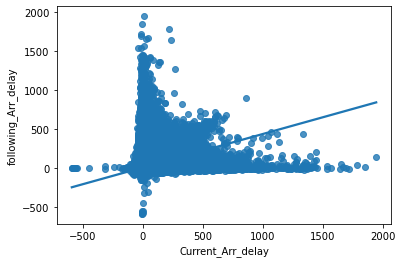

In [45]:
sns.regplot(data=data , x="Current_Arr_delay" , y="following_Arr_delay" , ci=None)

In [46]:
data["Current_Arr_delay"] . corr(data["following_Arr_delay"])

0.42939061062297534

In [1]:
#consider it being a cascading delay (cascading failure = 1 ) only if the following_Arr_Delay is greater than 0 and the Current_Arr_delay is greater than 0 

In [48]:
def clean(df):
    if (df["following_Arr_delay"]>0) & (df["Current_Arr_delay"]>0) :
        return 1
    else:
        return 0

In [49]:
data["cascading failure"] = data.apply(clean , axis=1)

In [50]:
#consider values which has Current_Arr_delay being greater than zero
data=data[data["Current_Arr_delay"] >0]

In [51]:
data

,Date,TailNum,DepTime,ArrTime,ArrDelay,DepDelay,Origin,Dest,Year,Month,DayofMonth,DateTime,set_origin,origin_matched,set_tailnumber,tailnumber_matched,following_Arr_delay,Current_Arr_delay,cascading failure
7450911,2007-01-01,80009E,1145,1407.0,26.0,-5.0,PHL,MEM,2007,1,1,2007-01-01 11:45:00,PHL,1,80009E,1,1.0,26.0,1
7450910,2007-01-01,80009E,1436,1546.0,1.0,1.0,MEM,XNA,2007,1,1,2007-01-01 14:36:00,MEM,1,80009E,1,-4.0,1.0,0
7451358,2007-01-02,80009E,709,743.0,4.0,4.0,GSP,MEM,2007,1,2,2007-01-02 07:09:00,GSP,1,80009E,1,-1.0,4.0,0
7451412,2007-01-02,80009E,1338,1531.0,5.0,-2.0,MEM,IAH,2007,1,2,2007-01-02 13:38:00,MEM,1,80009E,1,-14.0,5.0,0
7451789,2007-01-03,80009E,605,830.0,39.0,0.0,RIC,DTW,2007,1,3,2007-01-03 06:05:00,RIC,1,80009E,1,-10.0,39.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192004,2007-12-27,NHZOAL,1613,2317.0,9.0,3.0,OGG,OAK,2007,12,27,2007-12-27 16:13:00,OGG,1,NHZOAL,1,-28.0,9.0,0
14191897,2007-12-29,NHZOAL,1552,1633.0,1.0,2.0,KOA,HNL,2007,12,29,2007-12-29 15:52:00,KOA,1,NHZOAL,1,39.0,1.0,1
14191891,2007-12-30,NHZOAL,1958,244.0,39.0,53.0,KOA,OAK,2007,12,30,2007-12-30 19:58:00,KOA,1,NHZOAL,1,45.0,39.0,1
14191917,2007-12-31,NHZOAL,1130,1520.0,45.0,30.0,OAK,KOA,2007,12,31,2007-12-31 11:30:00,OAK,1,NHZOAL,1,8.0,45.0,1


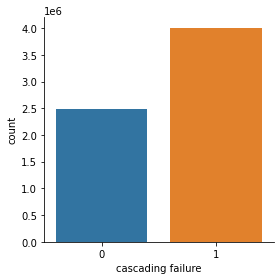

In [52]:
sns.catplot(data=data , kind = "count" , x="cascading failure" , height=4 , aspect=1 )

In [ ]:
#hence more proportion of the flights end up in a cascading failure due to the previous flight being delayed(considering the arrival delay) 
